<a href="https://colab.research.google.com/github/zainabbio/Youtube-Tutorials/blob/main/Protein_Protein_Docking_using_MEGADock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Molecular Docking**

Molecular docking is a computational technique used in drug design and biochemistry to predict how two molecules, typically a ligand (such as a drug molecule) and a receptor (usually a protein), interact with each other. The goal is to understand the binding affinity, orientation, and interaction between these molecules.

**Key Concepts of Molecular Docking:**

**1) Ligand:** A small molecule (like a drug or peptide) that binds to a receptor (usually a protein or enzyme).

**2) Receptor: **A large biomolecule, often a protein, which the ligand binds to in order to exert its effect (such as inhibiting an enzyme or activating a receptor).

**3) Docking:** The process of predicting the best fit or binding conformation of a ligand with a receptor. This involves identifying the optimal binding pose and calculating the strength of the interaction between them.

**4) Binding Affinity:** The strength of the interaction between the ligand and receptor, which can influence how effective the drug is in its target function.

**5) Scoring Functions:** Algorithms used to evaluate and rank the binding poses of the ligand in the receptor's active site based on how energetically favorable the interaction is.

**Applications of Molecular Docking:**

**1) Drug Discovery:** Docking helps identify potential drug candidates by predicting how well they can bind to a target receptor.

**2) Enzyme Inhibition:** It can be used to design inhibitors for enzymes that are involved in disease processes (e.g., cancer, viral infections).

**3) Peptide-Protein Interactions:**Studying the interaction of peptides with proteins to design better therapeutic peptides.

**4) Virtual Screening:**Docking allows high-throughput screening of large libraries of compounds to identify promising drug candidates.

**Types of Molecular Docking:**

**1) Rigid Docking:**

Assumption: Both the receptor and ligand are assumed to be rigid or inflexible—meaning their shapes do not change during the docking process.

Process: The ligand is placed into the receptor's binding site without any flexibility, and the best docking pose is predicted based on the spatial alignment of the ligand and the receptor’s rigid structure.

Pros: It is computationally faster and simpler because it doesn’t require complex calculations for flexibility.

Cons: It is less accurate for systems where the receptor or ligand undergo significant conformational changes upon binding. Many protein-ligand interactions are dynamic and require flexibility for accurate predictions.

Example Use: Good for early screening or systems where the receptor's structure is very stable.

**2) Flexible Docking:**

Assumption: Both the receptor and ligand are allowed to be flexible—their shapes can change during the docking process. This accounts for small conformational changes (e.g., side chain rearrangements) that might occur as the ligand binds to the receptor.

Process: The ligand is allowed to adjust its conformation during binding, and the receptor may also experience small changes in shape.

Pros: Provides more accurate results, especially when the ligand or receptor has flexible regions (e.g., loops, active sites).

Cons: More computationally expensive than rigid docking due to the added complexity of considering conformational changes in both the ligand and receptor.

Example Use: Useful when you expect the ligand to undergo conformational changes during binding or when dealing with dynamic proteins (like enzymes).

**4) Induced Fit Docking:**

Assumption: Both the ligand and the receptor are treated as flexible, and conformational changes in both occur upon binding. This method simulates how the receptor may change its conformation in response to ligand binding and vice versa.

Process: It goes a step beyond flexible docking by considering the induced conformational changes in both the receptor and ligand, which improves accuracy in predicting binding poses.

Pros: More realistic than rigid and flexible docking because it simulates the actual biological process where binding induces conformational changes. It’s especially useful for systems where the binding site undergoes significant alterations upon ligand binding.

Cons: It is computationally intensive and requires more time and resources compared to flexible docking.

Example Use: Best suited for systems where both the ligand and receptor undergo significant changes in shape upon binding, such as in enzyme-inhibitor complexes.

**Key Differences:**

Rigid Docking does not allow any conformational changes for either the receptor or ligand, making it simpler but less accurate for dynamic systems.

Flexible Docking allows the ligand (and sometimes the receptor) to adjust its shape during binding, providing more accuracy but being more computationally demanding.

Induced Fit Docking goes a step further by allowing both the ligand and the receptor to change shape, simulating the induced conformational changes that occur during binding, making it the most biologically accurate but computationally the most expensive.

**What is Protein-Protein Docking?**

Protein-protein docking is a computational method used to predict how two or more proteins interact with each other to form a stable complex. It involves simulating the binding process, where the protein molecules come together to form a functional unit. The goal of docking is to predict the binding mode (how the proteins fit together) and the binding affinity (how strongly they interact).

In essence, protein-protein docking predicts how two or more proteins, which are initially separate, can interact by considering their shape, charge distribution, and other structural features.

**Why is Protein-Protein Docking Important?**

Protein-protein interactions (PPIs) are fundamental to virtually all biological processes, including:

**Cell Signaling:** Proteins interact to transmit signals within cells, which regulates vital processes like cell division, immune response, and growth.

**Enzyme Activity:** Many enzymes work by binding to other proteins, and understanding these interactions helps us understand biochemical pathways.

**Disease Understanding:** Many diseases, like cancer, Alzheimer's, and viral infections, are caused by disruptions in normal protein-protein interactions. Studying these interactions helps identify disease mechanisms and potential drug targets.

**Drug Discovery:** Protein-protein docking is crucial for drug discovery, especially for targeted therapies. By understanding how drugs can block or enhance specific protein interactions, researchers can design more effective treatments. For example, protein inhibitors can be developed to prevent disease-causing protein interactions, such as inhibiting the interaction between a virus and its host cell.

**Therapeutic Development:** In cases of viral infections, like with HIV or SARS-CoV-2, targeting specific protein-protein interactions that are essential for the virus’s life cycle can be a strategy for developing antiviral drugs.

In this tutorial, we will perform protein–protein docking using MEGADOCK, a high-performance docking tool designed for accurate and efficient protein interactions. MEGADOCK is a cutting-edge software that enables researchers to predict how two proteins bind together, which is crucial for understanding biological processes and drug design.

This notebook is based on the published work of Masahito Ohue here is the link https://bmcresnotes.biomedcentral.com/articles/10.1186/s13104-023-06505-w#:~:text=MEGADOCK%2C%20a%20protein%E2%80%93protein%20docking,environment%20compatible%20with%20Google%20Colaboratory.

In [1]:
# @title Install Required Software for MEGADOCK and Dependencies

# Clone the MEGADOCK repository from GitHub
!git clone https://github.com/akiyamalab/MEGADOCK

# Clone the CUDA samples for GPU support (optional but recommended)
!git clone https://github.com/NVIDIA/cuda-samples

# Install required libraries for FFTW3 (Fast Fourier Transform) support
!apt-get install -y libfftw3-dev libfftw3-single3

# Change the directory to the MEGADOCK folder and build the software using the Makefile
%cd ./MEGADOCK
!make -j 2 -f Makefile.colab

# Install Biopython for computational biology tasks
!pip install -q biopython

# Install NGLView for 3D visualization of molecular structures
!pip install nglview==3.0.8

# Enable NGLView extension for Jupyter notebooks
!jupyter-nbextension enable nglview --py --sys-prefix

fatal: destination path 'MEGADOCK' already exists and is not an empty directory.
fatal: destination path 'cuda-samples' already exists and is not an empty directory.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libfftw3-dev is already the newest version (3.3.8-2ubuntu8).
libfftw3-single3 is already the newest version (3.3.8-2ubuntu8).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/content/MEGADOCK
mkdir -p obj_gs
--------------------------
make megadock-gpu start
--------------------------
g++ -fPIC -fopenmp -o ./megadock-gpu obj_gs/control.cpp.o obj_gs/cpu_time.cpp.o obj_gs/docking.cpp.o obj_gs/parameter.cpp.o obj_gs/pdb_entry.cpp.o obj_gs/protein.cpp.o obj_gs/receptor.cpp.o obj_gs/ligand.cpp.o obj_gs/fft_process.cu.o obj_gs/main.cu.o -lm -L/usr/local/lib -lfftw3f -L/usr/local/cuda/lib64 -lcudart -lcufft
Enabling notebook extension nglview-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/

In [33]:
# @title **Receptor and Ligand PDB IDs Setup**

# Define Receptor PDB ID and Chain
R_pdb_id = "2XKN"  # Receptor PDB ID (string format)
R_chain = "A"      # Receptor Chain ID (string format)

# Define Ligand PDB ID and Chain
L_pdb_id = "6N65"  # Ligand PDB ID (string format)
L_chain = "A"      # Ligand Chain ID (string format)

# @title **MEGADOCK Parameters Setup**

# Set MEGADOCK parameters
t = "3"            # Number of trials (string format)
N = "10800"        # Number of docking steps (string format)
outfile_name = "dock.out"  # Output file name for docking results (string format)

# Print the settings (Optional, for confirmation)
print("Receptor and Ligand Setup:")
print(f"Receptor PDB ID: {R_pdb_id} | Chain: {R_chain}")
print(f"Ligand PDB ID: {L_pdb_id} | Chain: {L_chain}")

print("\nMEGADOCK Parameters:")
print(f"Trials (t): {t}")
print(f"Docking Steps (N): {N}")
print(f"Output File: {outfile_name}")

Receptor and Ligand Setup:
Receptor PDB ID: 2XKN | Chain: A
Ligand PDB ID: 6N65 | Chain: A

MEGADOCK Parameters:
Trials (t): 3
Docking Steps (N): 10800
Output File: dock.out


In [4]:
!pip install wget

In [34]:
# @title **PDB Preparation and Download**

import os
import wget
from Bio.PDB import PDBParser, PDBIO

# Ensure the Biopython library is installed
!pip install -q biopython

# Function to download the PDB files if they don't exist
def download_pdb(pdb_id):
    pdb_filename = f"{pdb_id}.pdb"
    if not os.path.exists(pdb_filename):
        pdb_url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
        print(f"Downloading {pdb_id} from: {pdb_url}")
        wget.download(pdb_url, pdb_filename)
    else:
        print(f"PDB file for {pdb_id} already exists.")
    return pdb_filename

# Download the receptor and ligand PDB files
R_pdb_file = download_pdb(R_pdb_id)
L_pdb_file = download_pdb(L_pdb_id)

# Function to extract and save a specific chain from a PDB file
def save_chain(pdb_file, chain_id, output_filename):
    parser = PDBParser()
    structure = parser.get_structure(pdb_file, pdb_file)
    io = PDBIO()

    for chain in structure.get_chains():
        if chain.get_id() == chain_id:
            io.set_structure(chain)
            io.save(output_filename)
            print(f"Chain {chain_id} saved as {output_filename}")
            return output_filename
    print(f"Chain {chain_id} not found in {pdb_file}.")
    return None

# Extract and save the receptor chain
receptor_output_file = f"{R_pdb_id}_{R_chain}.pdb"
save_chain(R_pdb_file, R_chain, receptor_output_file)

# Extract and save the ligand chain
ligand_output_file = f"{L_pdb_id}_{L_chain}.pdb"
save_chain(L_pdb_file, L_chain, ligand_output_file)

Chain A saved as 2XKN_A.pdb
Chain A saved as 6N65_A.pdb


/usr/local/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14356.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14416.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14430.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15054.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15578.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16132.
  warnings.warn(
/usr/local/lib/python3

'6N65_A.pdb'

In [35]:
# @title MEGADOCK Parameter Setting

import os

# Define MEGADOCK parameters
t = 1  # Replace with your desired value for the parameter 't'
N = 10  # Replace with your desired value for the parameter 'N'
pdbr = "receptor_chain.pdb"  # Replace with the receptor PDB file name
pdbl = "ligand_chain.pdb"    # Replace with the ligand PDB file name
outfile_name = "output.txt"  # Replace with your desired output file name

# Set the environment variables for MEGADOCK
os.environ['MDt'] = str(t)
os.environ['MDN'] = str(N)
os.environ['MDPDBR'] = pdbr
os.environ['MDPDBL'] = pdbl
os.environ['MDOF'] = str(outfile_name)

# Print the set parameters for confirmation (optional)
print(f"MEGADOCK Parameters Set:")
print(f"t = {os.environ['MDt']}")
print(f"N = {os.environ['MDN']}")
print(f"Receptor PDB = {os.environ['MDPDBR']}")
print(f"Ligand PDB = {os.environ['MDPDBL']}")
print(f"Output File = {os.environ['MDOF']}")

MEGADOCK Parameters Set:
t = 1
N = 10
Receptor PDB = receptor_chain.pdb
Ligand PDB = ligand_chain.pdb
Output File = output.txt


In [36]:
# @title **Run MEGADOCK**

import os

# Ensure that the necessary environment variables are set for MEGADOCK
os.environ['MDt'] = str(t)           # Number of trials for MEGADOCK
os.environ['MDN'] = str(N)           # Number of docking steps
os.environ['MDPDBR'] = receptor_output_file  # Receptor PDB file
os.environ['MDPDBL'] = ligand_output_file    # Ligand PDB file
os.environ['MDOF'] = outfile_name    # Output file for docking results

# Command to run MEGADOCK using the environment variables set above
megadock_command = f"./megadock-gpu -R $MDPDBR -L $MDPDBL -t $MDt -N $MDN -o $MDOF"

# Print the command to verify it
print(f"Running MEGADOCK with the following command:\n{megadock_command}")

# Execute the MEGADOCK command
os.system(megadock_command)

Running MEGADOCK with the following command:
./megadock-gpu -R $MDPDBR -L $MDPDBL -t $MDt -N $MDN -o $MDOF


0

In [37]:
#@title Run MEGADOCK
!./megadock-gpu -R $MDPDBR -L $MDPDBL -t $MDt -N $MDN -o $MDOF

 MEGADOCK ver. 4.1.3 for GPU & single node
      megadock@bi.c.titech.ac.jp   lastupdated: 26 March, 2019

# Using OpenMP parallelization: 2 threads.
# Using CUDA device 0: Tesla T4
# CUFFT version : 11203
# Number of available [threads / GPUs] : [2 / 1]
# Set number of scores per one angle = 1
# Number of output = 10
# Output file = output.txt
# Using   2 CPU cores, 1 GPUs

Receptor = 2XKN_A.pdb
Receptor max size = 67.987
Required voxel size = 83.987
Number of grid = 70
FFT N = 140

Ligand = 6N65_A.pdb
Ligand max size = 43.3767
Required voxel size = 49.3767
Number of grid = 42
FFT N = 84
Memory requirement (/node)  = 160.0 MB
# GPU Memory : Use 184.9 MB ( 1.0%), Free 14910.1 MB (98.0%), Total 15095.1 MB

---------- Start docking calculations

Ligand = 6N65_A.pdb
Target receptors:
 2XKN_A.pdb

   >Ligand rotation =   360 /  3600 ( 0)
   >Ligand rotation =   720 /  3600 ( 0)
   >Ligand rotation =  1080 /  3600 ( 0)
   >Ligand rotation =  1440 /  3600 ( 0)
   >Ligand rotation =  1800 /  

In [38]:
# @title Enable Custom Widget Manager in Google Colab

from google.colab import output

# Enabling the custom widget manager
output.enable_custom_widget_manager()

In [39]:
# @title **Import Required Libraries**

# Importing general libraries
import os
import sys
import urllib
import pylab
import pandas as pd
from collections import Counter

# Importing specific libraries for bioinformatics and structural biology
from Bio import SeqIO, SearchIO, Entrez
from Bio.Seq import Seq
from Bio.PDB import PDBParser, MMCIFParser
import Bio

# Importing ipywidgets and display libraries for interactive widgets
import ipywidgets as widgets
from IPython.display import display

# Importing nglview for molecular visualization
import nglview as nv

# Download utility for handling URLs
from urllib.request import urlretrieve

In [40]:
#@title Show the 1st solution on PDB viewer (NGLView).
!./decoygen lig.1.pdb $MDPDBL $MDOF 1
!cat $MDPDBR lig.1.pdb | sed 's/END//g' > complex1.pdb
from google.colab import output
output.enable_custom_widget_manager()
import nglview as nv
view = nv.show_structure_file("complex1.pdb")
view

NGLWidget()

In [41]:
#@title Show the top 10 solutions on PDB viewer (NGLView)
!./decoygen lig.2.pdb $MDPDBL $MDOF 2
!./decoygen lig.3.pdb $MDPDBL $MDOF 3
!./decoygen lig.4.pdb $MDPDBL $MDOF 4
!./decoygen lig.5.pdb $MDPDBL $MDOF 5
!./decoygen lig.6.pdb $MDPDBL $MDOF 6
!./decoygen lig.7.pdb $MDPDBL $MDOF 7
!./decoygen lig.8.pdb $MDPDBL $MDOF 8
!./decoygen lig.9.pdb $MDPDBL $MDOF 9
!./decoygen lig.10.pdb $MDPDBL $MDOF 10
!cat complex1.pdb lig.2.pdb lig.3.pdb lig.4.pdb lig.5.pdb lig.6.pdb lig.7.pdb lig.8.pdb lig.9.pdb lig.10.pdb | sed 's/END//g' > complex10s.pdb
from google.colab import output
output.enable_custom_widget_manager()
import nglview as nv
view = nv.show_structure_file("complex10s.pdb")
view

NGLWidget()

In [48]:
#@title PPI score calculation (for protein-protein interaction prediction)
!./ppiscore $MDOF $MDN

output.txt, E = 2.5553, 10 decoys


Support for third party widgets will remain active for the duration of the session. To disable support:

In [50]:
from google.colab import output
output.disable_custom_widget_manager()

In [58]:
!git clone https://github.com/hgbrian/pdb2png

fatal: destination path 'pdb2png' already exists and is not an empty directory.


In [59]:
# Clone the PyMOL Open-Source repository
!git clone https://github.com/schrodinger/pymol-open-source.git

# Clone the mmtf-cpp repository
!git clone https://github.com/rcsb/mmtf-cpp.git

# Move necessary header files
!mv mmtf-cpp/include/mmtf* pymol-open-source/include/

# Navigate to the PyMOL source directory
%cd /content/pymol-open-source

# Update package lists
!apt-get update

# Install dependencies
!apt-get install -y libglew-dev
!apt-get install -y libglm-dev

# Install PyMOL
!python setup.py install --quiet

fatal: destination path 'pymol-open-source' already exists and is not an empty directory.
fatal: destination path 'mmtf-cpp' already exists and is not an empty directory.
mv: cannot stat 'mmtf-cpp/include/mmtf*': No such file or directory
[Errno 2] No such file or directory: '/content/pymol-open-source'
/content/MEGADOCK
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://

In [60]:
#@title PDB ID and chains
#Please provide the 4 letter PDB ID of the protein protein complex
# Example shown below '1PXV', (Protein complex of cysteine protease with cysteine protease Inhibitor)
PDB = '/content/MEGADOCK/complex1.pdb'#@param {type:"string"}
#PDB =  'PDB'#@param {type:"string"}
#Please proivde the two chains below to define the interface of the protein complex
# Example shown below the two chains 'A:C' of the complex cysteine protease with cysteine protease Inhibitor
#chains = 'A:B'
chain_A =  'A'#@param {type:"string"}
chain_B =  'C'#@param {type:"string"}

In [61]:
# Install conda
!pip install -q condacolab
import condacolab
condacolab.install()

# Activate conda in the current kernel.
import condacolab
condacolab.check()

# Install pymol using conda.
!conda install -c conda-forge -c schrodinger pymol-bundle -y
# Install PyQt5 as well as per the search result [1].
!pip install PyQt5

#Install other requirements for pdb2png
!pip install py3Dmol
# Verify PyMOL installation
try:
    import pymol
    print("PyMOL installed successfully.")
except ImportError:
    print("PyMOL installation failed.")

#Clone the pdb2png repo
!git clone https://github.com/hgbrian/pdb2png
# Install pdb2png in the current environment
%cd /content/pdb2png
!pip install .

# Test pdb2png
!python pdb2png.py -h

✨🍰✨ Everything looks OK!
✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
 - schrodinger
Platform: linux-64
Solving environment: \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

PyMOL installed successfully.
fatal: destination path 'pdb2png' already exists and is not an empty directory.
/content/pdb2png
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.
usage: pdb2png.py [-h] [--protein_rotate PROTEIN_ROTATE] [--protein_color PROTEIN_COLOR]
                  [--protein_zoom PROTEIN_ZOOM] [--hetatm_color HETATM_COLOR]
                  [--ligand_id LIGAND_ID] [--ligand_chain LIGAND_CHAIN]
                  [--ligand_zoom LIGAND_ZOOM] [--ligand_color LIGAND_COLOR] [--show_water]
                  [--render_style RENDER_STYLE]

In [65]:
import os

# Set the PDB file path to your existing docked complex
pdb_file = '/content/MEGADOCK/complex1.pdb'

# Change directory to where pdb2png is located
os.chdir('/content/pdb2png')

# Run the pdb2png command on the existing PDB file
!python pdb2png.py {pdb_file}

In [66]:
# ipython-input-1-
# Install conda
!pip install -q condacolab
import condacolab
condacolab.install()

# Activate conda in the current kernel.
import condacolab
condacolab.check()

# Install pymol using conda.
!conda install -c conda-forge -c schrodinger pymol-bundle -y
# Install PyQt5 as well as per the search result [1].
!pip install PyQt5

#Install other requirements for pdb2png
!pip install py3Dmol
# Verify PyMOL installation
try:
    import pymol
    print("PyMOL installed successfully.")
except ImportError:
    print("PyMOL installation failed.")

#Clone the pdb2png repo
!git clone https://github.com/hgbrian/pdb2png
# Install pdb2png in the current environment
# %cd /content/pdb2png #No need to change the directory
!pip install /content/pdb2png #install from the correct location

# Test pdb2png
!python /content/pdb2png/pdb2png.py -h # Test from the correct location

✨🍰✨ Everything looks OK!
✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
 - schrodinger
Platform: linux-64
Solving environment: / - \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

PyMOL installed successfully.
fatal: destination path 'pdb2png' already exists and is not an empty directory.
ERROR: Directory '/content/pdb2png' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.
usage: pdb2png.py [-h] [--protein_rotate PROTEIN_ROTATE] [--protein_color PROTEIN_COLOR]
                  [--protein_zoom PROTEIN_ZOOM] [--hetatm_color HETATM_COLOR]
                  [--ligand_id LIGAND_ID] [--ligand_chain LIGAND_CHAIN]
                  [--ligand_zoom LIGAND_ZOOM] [--ligand_color LIGAND_COLOR] [--show_water]
                  [--render_style RENDER_STYLE] [--width WIDT

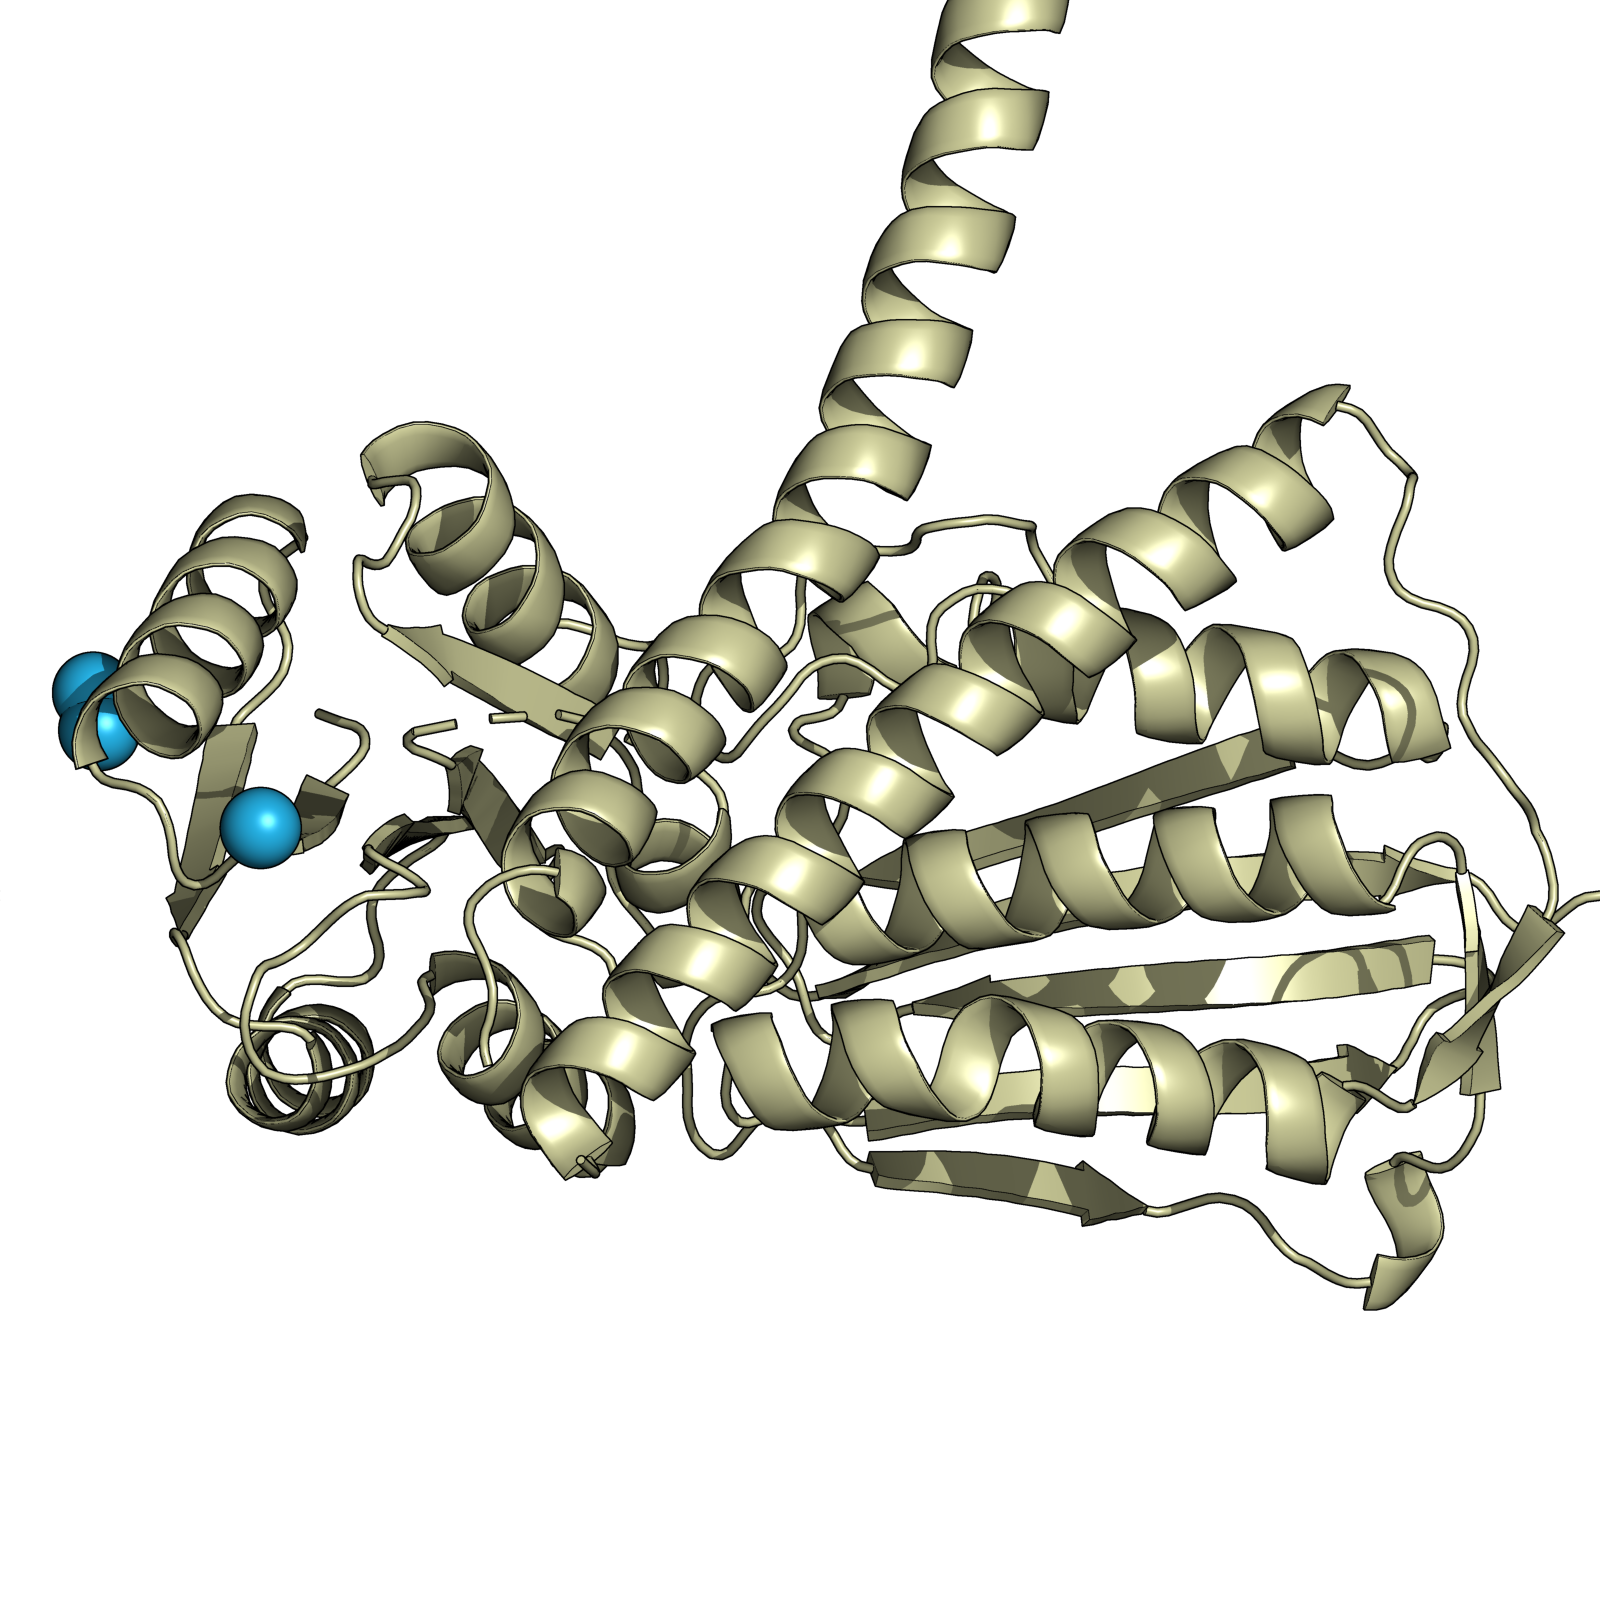

In [67]:
import os
from IPython.display import Image

# Path to your existing PDB file
pdb_file = '/content/MEGADOCK/complex1.pdb'

# Change directory to where pdb2png is located
os.chdir('/content/pdb2png')

# Specify the output PNG file path
png_file = f"/content/{os.path.basename(pdb_file).replace('.pdb', '.png')}"

# Run pdb2png command to convert PDB to PNG
!python pdb2png.py {pdb_file}

# Now display the generated PNG image
Image(png_file)

The PPI Score can be used to predict whether two protein chains are likely to interact. The relationship between precision (positive predictive value, PPV) and the PPI Score is illustrated in the figure below.

When the PPI Score predicts a "PPI positive" result, the precision is approximately 10%.
When the PPI Score predicts a "PPI positive" result, the precision increases to around 50%.
When the PPI Score predicts a "PPI positive" result, the precision reaches about 80%.

**Acknowledgment and References:**

I have prepared this Google Colaboratory notebook to help you perform protein-protein docking using MEGADOCK 4. This notebook provides an easy-to-use interface for running docking simulations, enabling you to analyze protein interactions in an efficient way.

MEGADOCK 4: GitHub repository
Citation: Ohue M, et al. Bioinformatics, 30(22): 3281-3283, 2014. DOI: 10.1093/bioinformatics/btu532

License: MEGADOCK is licensed under CC BY-NC 4.0. Commercial use of MEGADOCK and its derivatives is not permitted without formal prior authorization from the Tokyo Institute of Technology.